# 디지털신호처리 (DSP) HW04
#### 이름 : 이연우
#### 학번 : 201810793
#### 학과 : 휴먼지능정보공학과


In [46]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### - Exercise 2.3
Make a square signal at 1100 Hz and make a wave that samples it at 10000 frames per second. If you plot the spectrum, you can see that most of the harmonics are aliased. When you listen to the wave, can you hear the aliased harmonics?

### - Square signal (사각 신호) wave 그래프

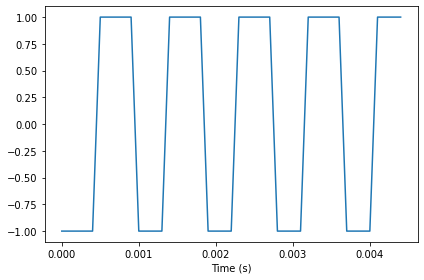

In [47]:
from thinkdsp import SquareSignal, decorate

signal = SquareSignal(1100) # 1100Hz 의 square signal
duration = signal.period*5 # 5개의 주기만 보기
segment = signal.make_wave(duration, framerate = 10000) # 초당 10000 프레임 샘플링
segment.plot()
decorate(xlabel = 'Time (s)')

### - Square signal의 Spectrum(스팩트럼)

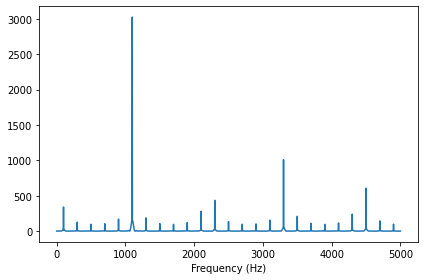

In [48]:
wave = signal.make_wave(duration = 0.5, framerate = 10000)
wave.apodize()
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

In [49]:
spectrum.peaks()[:10] #(가장 높은 점, 주파수)

[(3024.441394864274, 1100.0),
 (1009.4751106468959, 3300.0),
 (607.2830560424678, 4500.0),
 (435.4936664176005, 2300.0),
 (340.5126469753554, 100.0),
 (280.4528053168873, 2100.0),
 (239.2056013394832, 4300.0),
 (209.25548013560032, 3500.0),
 (186.6252863923886, 1300.0),
 (169.01407112058735, 900.0)]

Fundamental Frequency(기본 주파수)는 1100Hz이며 첫 번째 Harmonics는 3300Hz, 두 번째 Harmonics는 5500Hz인데 4500Hz로 Aliasing이 됐으며 세 번째, 네 번째 또한 7700Hz은 2300Hz로 9900Hz는 100Hz로 Aliasing이 됐다. 다섯 번째 Harmonics는 12100Hz에서 -2100Hz로 Aliasing이 되고 또 한 번 Alising이 돼 2100Hz가 됐다. 이후 Harmonics들은 모두 앞에서 본 것처럼 Aliasing 된다.

In [50]:
wave.make_audio()

밑의 Sampling을 20000번 한 오디오와 위의 10000번 한 오디오를 비교하여 들어봤을 때 우리는 Alising의 소리를 더 뚜렷하게 들을 수 있다. Alising이 일어나면서 Harmonics가 배수로 나타나지 않아 귀에 거슬리는 소리가 들리는데 이는 Sampling을 많이 할수록 줄어든다.(하지만 Sampling을 많이 하면 데이터와 처리 양이 많아져 처리 속도가 느려짐)

In [51]:
wave2 = SquareSignal(1100).make_wave(duration = 0.5, framerate = 20000)
wave2.make_audio()